Loading database at datasets/unwrapped_1.5m...
Database contains 1186 images
Maximum angle offset for training: 0.870798°
Loading database at datasets/unwrapped_1m...
Database contains 1186 images
Starting get_ridf_headings()...
get_ridf_headings() took 10.286 s to run (without caching)
Saving result to cache '.navbench_cache/3559869667.py_get_ridf_headings_287b2783200edafedfa44e0611ca59c6e509a2f95f53237f8e9bff44644deec4.pkl'
Loading database at datasets/unwrapped_1.5m...
Database contains 1186 images
Using cached result from '.navbench_cache/3559869667.py_get_ridf_headings_287b2783200edafedfa44e0611ca59c6e509a2f95f53237f8e9bff44644deec4.pkl'
get_ridf_headings() took 10.286 s to run (without caching)
Loading database at datasets/unwrapped_2m...
Database contains 1453 images
Starting get_ridf_headings()...
get_ridf_headings() took 12.4105 s to run (without caching)
Saving result to cache '.navbench_cache/3559869667.py_get_ridf_headings_459e32dccbaa5e1fc38064a59ccf4714420bfbc30873a038fed

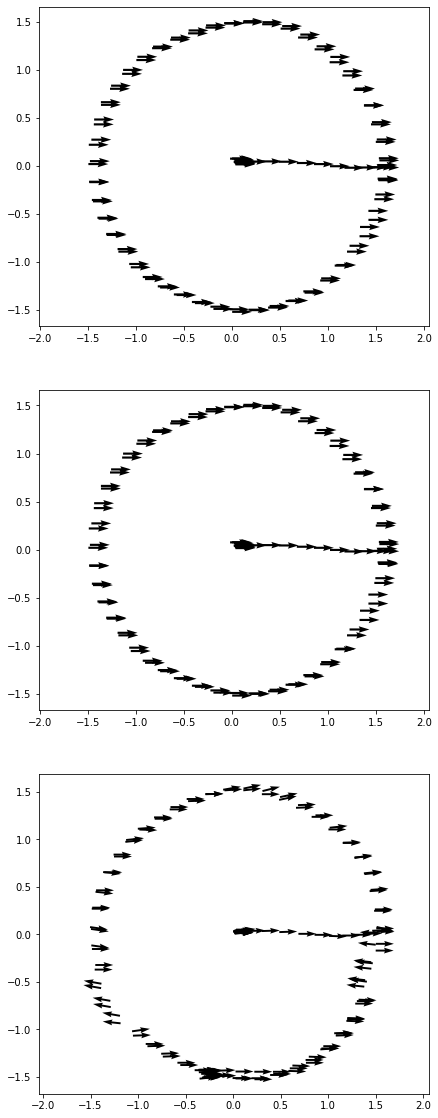

In [5]:
import sys
sys.path.append('../navbench')

from time import time
import matplotlib.pyplot as plt
import numpy as np

import navbench as nb
from navbench import imgproc as ip

PREPROC = ip.resize(180, 40)
TEST_DBS = ("1m", "1.5m", "2m")
db_train = nb.Database('datasets/unwrapped_1.5m')
dbs_test = (nb.Database('datasets/unwrapped_' + name) for name in TEST_DBS)

print('Maximum angle offset for training: %g°' % np.max(np.abs(db_train.heading)))

_, axes = plt.subplots(len(TEST_DBS), figsize=(7, 20))
for ax, db_test in zip(axes, dbs_test):
    test_entries = range(0, len(db_test), 10)
    snapshots = db_train.read_images(entries=range(0, len(db_train), 5), preprocess=PREPROC)
    images = db_test.read_images(entries=test_entries, preprocess=PREPROC)

    headings = nb.get_ridf_headings(images, snapshots)
    u = np.cos(headings)
    v = np.sin(headings)
    ax.quiver(db_test.x[test_entries], db_test.y[test_entries], u, v)
    ax.axis('equal');